In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_dict = pickle.load(open('./data1.pickle', 'rb'))

In [3]:
max_length = max(len(seq) for seq in data_dict['data'])
padded_data = [np.pad(seq, (0, max_length - len(seq)), mode='constant') for seq in data_dict['data']]

In [4]:
x = np.asarray(padded_data)
y = np.asarray(data_dict['labels'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

In [6]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)


In [7]:
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [8]:
y_predict = model.predict(x_test)

In [9]:
score = accuracy_score(y_predict, y_test)

In [10]:
score

0.9944444444444445

In [75]:
cm = confusion_matrix(y_predict,y_test)

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


In [14]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:
print("Meilleurs hyperparamètres:", grid_search.best_params_)

Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)


In [18]:
accuracy

0.9972222222222222

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, x_train, y_train, cv=5)
mean_score = np.mean(scores)

In [20]:
mean_score

0.9986111111111111

# Sauvegarder le modèle

In [30]:
with open('best_model.pickle', 'wb') as file:
    pickle.dump(best_model, file)

# Tester le modèle sur des images capturées 

In [23]:
with open('best_model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)

In [24]:
import cv2
img_test = "C:/Users/Tellili Eya/Desktop/IDS5/ProjetFed/Data/data/numbers/28/0.jpg"
img = cv2.imread(img_test)
frame_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

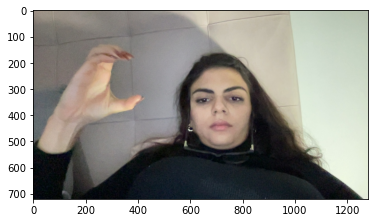

In [25]:
plt.imshow(frame_rgb)

In [26]:
import mediapipe as mp
import numpy as np

In [27]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


In [28]:
results = hands.process(frame_rgb)
data_aux = []
x_ = []
y_ = []
H, W, _ = img.shape
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
        img,  # image to draw
        hand_landmarks,  # model output
        mp_hands.HAND_CONNECTIONS,  # hand connections
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())

    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))



In [29]:
data_aux = np.pad(data_aux, (0, 84 - len(data_aux)), mode='constant')

In [30]:
prediction = loaded_model.predict([np.asarray(data_aux)])

In [31]:
prediction

array(['2'], dtype='<U1')

In [32]:
prediction[0]

'2'